In [1]:
library(dplyr)
library(tidyr)
library(tidyverse)
library(tidymodels)
library(repr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ ggplot2   3.4.4     ✔ stringr   1.5.0
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ r

In [24]:
# Title: The negative epidemic of country-born talent triumphing within the Tennis World
 
# Tennis is a popular sport that has been played and enjoyed by millions of people around the world for 
# centuries. Founded in 1890, it’s captured the hearts of many with its fast-paced rallies, strategic 
# gameplay, and enticing matches. There’ve been many legends that have graced the sport. Some of them 
# you may have heard of, such as Rafael Nadal, one of the youngest and oldest players to have won a Grand 
# Slam, consistently dominating the scene. Then you have other outstanding players such as Roger Federer, 
# and Novak Djokovic. Something about all 3 of these players though is that they hail from different 
# countries. Rafael is from Spain, Novak is from Serbia, and Roger is from Switzerland. Naturally, we got 
# curious. Which country has produced the most powerhouses within tennis? The dataset that will be used 
# to answer our question is player_stats.csv, which has data on an incredible amount of plays, such as 
# their age, country, plays, current rank (points), best rank (date), name, height, seasons, turned pro 
# (year), and much more. The question that we are trying to answer with our dataset is, “Which country has 
# been able to develop the most amount of Tennis Talent?”


In [22]:
# Preliminary Exploratory Data Analysis - all down below!

Loading our tennis player data into R

In [2]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file(url, "player_stats.csv")
tennis_data <- read_csv("player_stats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
tennis_data_deleted <- tennis_data |> 
        rename(Current_Rank = "Current Rank",Best_rank ="Best Rank",Favorite_Surface="Favorite Surface",
               Turned_Pro="Turned Pro",Current_Elo_Rank="Current Elo Rank",Best_Elo_Rank="Best Elo Rank",
               Peak_Elo_Rating="Peak Elo Rating",Last_Appearance="Last Appearance",GOAT_Rank="GOAT Rank",
               Best_Season="Best Season") |>
        select(- c(...1,Wikipedia, Height, Masters, Birthplace, Residence, Weight, Coach,
                   Facebook,Twitter, Nicknames, "Davis Cups", Olympics, "Grand Slams",
                   "Web Site", "Team Cups", "Weeks at No. 1", "Tour Finals"))

In [4]:
Separated_Age_Age_When <- separate(tennis_data_deleted,Age,into= c("Age","Age_When"),sep= "\\(") |> 
        separate(Age_When,into= c("Age_When","blank"),sep= "\\)")|>select(-blank)
#Separated Age to Age and Age_When

In [5]:
Separated_Current_Rank_Points <-separate(Separated_Age_Age_When,Current_Rank,into= c("Current_Rank","Current_Rank_Points"),sep= "\\(") |>
        separate(Current_Rank_Points,into= c("Current_Rank_Points","blank"),sep= "\\)")|>
        select(-blank)
#Separated Current_Rank to Current_Rank and Current_Rank_Points

In [6]:
Best_rank_When <-separate(Separated_Current_Rank_Points,Best_rank,into= c("Best_rank","Best_rank_When"),sep= "\\(" ) |>
        separate(Best_rank_When,into= c("Best_rank_When","blank"),sep= "\\)") |>
        select(-blank)

In [7]:
Seperated_Current_Elo_Rank <-separate(Best_rank_When,Current_Elo_Rank,into= c("Current_Elo_Rank","Current_Elo_Rank_Points"),sep= "\\(" ) |>
        separate(Current_Elo_Rank_Points,into= c("Current_Elo_Rank_Points","blank"),sep= "\\)")|>
        select(-blank)

In [8]:
Seperated_Best_Elo_Rank <-separate(Seperated_Current_Elo_Rank,Best_Elo_Rank,into= c("Best_Elo_Rank","Best_Elo_Rank_Date"),sep= "\\(" ) |>
        separate(Best_Elo_Rank_Date,into= c("Best_Elo_Rank_Date","blank"),sep= "\\)") |>
        select(-blank)


In [9]:
Separated_Peak_Elo_Rating<-separate(Seperated_Best_Elo_Rank,Peak_Elo_Rating	,into= c("Peak_Elo_Rating","Peak_Elo_Rating_Date"),sep= "\\(" ) |>
        separate(Peak_Elo_Rating_Date,into= c("Peak_Elo_Rating_Date","blank"),sep= "\\)")|>
        select(-blank)

In [10]:
Seperated_GOAT_Rank <-separate(Separated_Peak_Elo_Rating,GOAT_Rank,into= c("GOAT_Rank_Points","GOAT_Rank"),sep= "\\(" ) |>
        separate(GOAT_Rank,into= c("GOAT_Rank","blank"),sep= "\\)") |>
        select(-blank)

In [11]:
#lacking the Surface Data to do

In [12]:
tennis_data_remain <- select(Seperated_GOAT_Rank,c(Age, Country, Current_Rank, Current_Rank_Points, Best_rank, Best_rank_When,Name))|>
    mutate(Age=as.numeric(Age),Current_Rank=as.numeric(Current_Rank),Current_Rank_Points=as.numeric(Current_Rank_Points),Best_rank=as.numeric(Best_rank)) |>
    drop_na(Current_Rank_Points)


In [13]:
tennis_data_sorted <- arrange(tennis_data_remain,desc(as.numeric(Current_Rank_Points)))
tennis_data_sorted

Age,Country,Current_Rank,Current_Rank_Points,Best_rank,Best_rank_When,Name
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
33,Spain,1,10235,1,18-08-2008,Rafael Nadal
32,Serbia,2,9720,1,04-07-2011,Novak Djokovic
38,Switzerland,3,6590,1,02-02-2004,Roger Federer
23,Russian Federation,4,5960,4,09-09-2019,Daniil Medvedev
26,Austria,5,5890,4,06-11-2017,Dominic Thiem
21,Greece,6,5375,5,05-08-2019,Stefanos Tsitsipas
22,Germany,7,3345,3,06-11-2017,Alexander Zverev
23,Italy,8,2870,8,04-11-2019,Matteo Berrettini
31,Spain,9,2630,9,04-11-2019,Roberto Bautista Agut


In [14]:
set.seed(200)

tennis_split <- initial_split(tennis_data_sorted, prop = 0.75, strata = Country)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


Here we are trying to look at the top 10 countries with the most players within the original data set as we are looking at which country produces the **MOST** talent. This will ignore countries with sole players as their only talent, as we would like to look at the likelihood of which countries produce talented players. By looking at the subsets of data with this finding, we can make some earlier predictions and expectations.

In [15]:
tennis_data_region <- tennis_data_sorted |>
    group_by(Country) |>
    summarize(count = n()) |> 
    arrange(desc(count)) |>
    slice(1:10) 
tennis_data_region

Country,count
<chr>,<int>
France,46
United States,39
Italy,37
Spain,34
Germany,29
Argentina,28
Australia,23
Russian Federation,20
Japan,19


In [16]:
#Finding the total points from each country
total_japan <- tennis_train |>
    filter(Country == "Japan") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1) 

total_france <- tennis_train |>
    filter(Country == "France") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_united_states <- tennis_train |>
    filter(Country == "United States") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_italy <- tennis_train |>
    filter(Country == "Italy") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_germany <- tennis_train |>
    filter(Country == "Germany") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_spain <- tennis_train |>
    filter(Country == "Spain") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_australia <- tennis_train |>
    filter(Country == "Australia") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_argentina <- tennis_train |>
    filter(Country == "Argentina") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_russian_federation <- tennis_train |>
    filter(Country == "Russian Federation") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_brazil <- tennis_train |>
     filter(Country == "Brazil") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

In [44]:
total_country_points <- rbind(total_france, total_united_states,
                              total_italy, total_spain,
                              total_germany, total_argentina,
                              total_australia, total_russian_federation, 
                              total_japan, total_brazil)
total_country_points

Country,Country_Points
<chr>,<dbl>
France,14891
United States,6685
Italy,12578
Spain,18006
Germany,8580
Argentina,7526
Australia,8132
Russian Federation,6001
Japan,2759


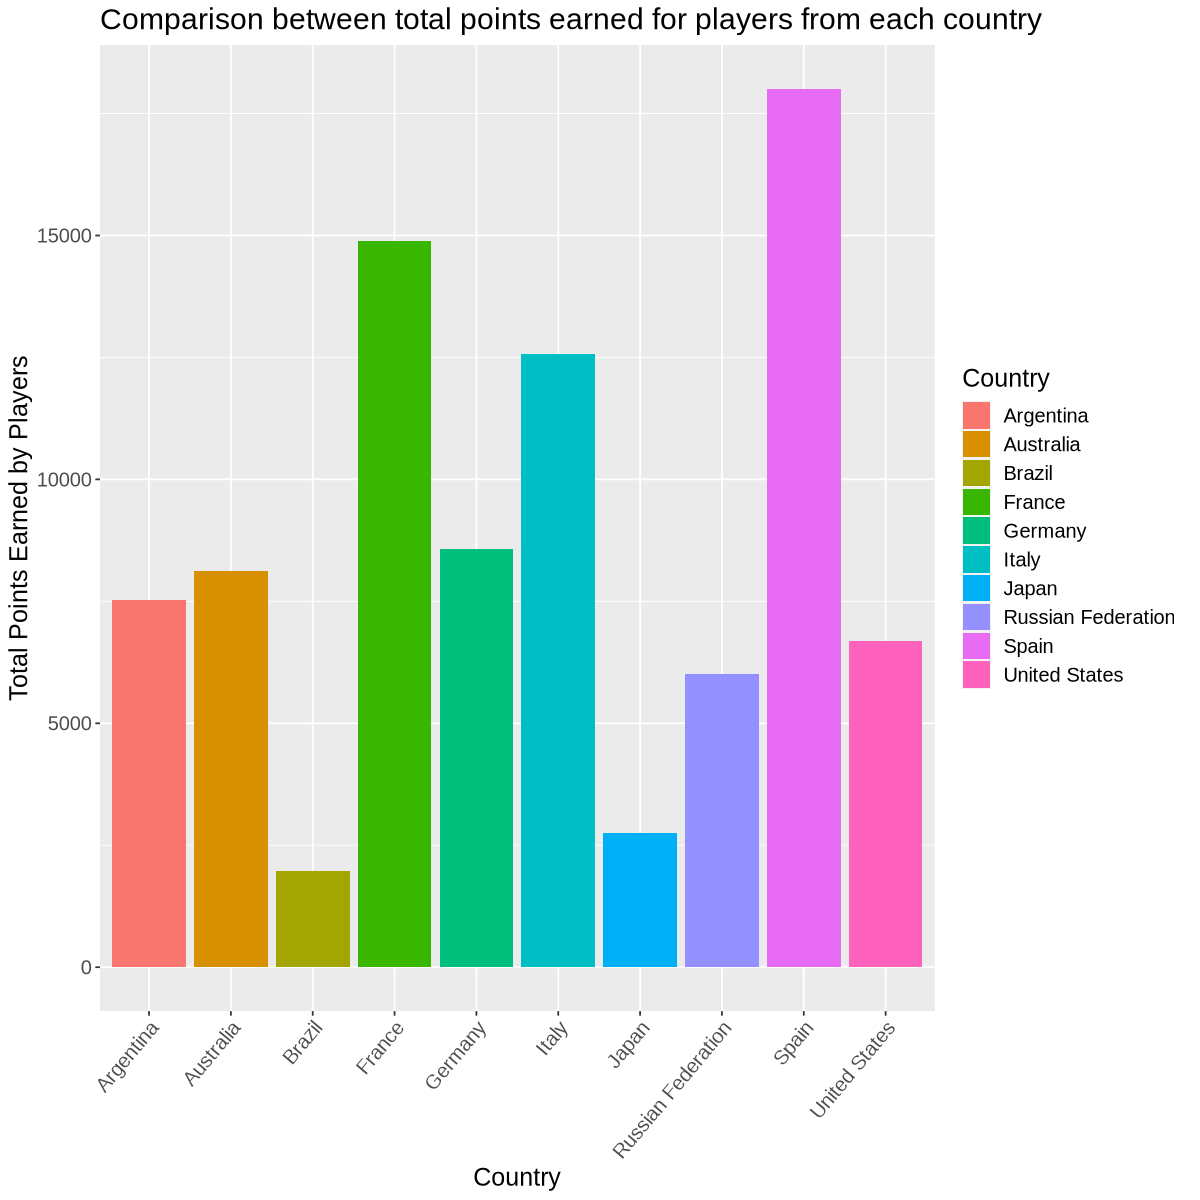

In [43]:
options(repr.plot.width = 10, repr.plot.height = 10)
country_vs_points <- total_country_points |>
                    ggplot(aes(x = Country, y = Country_Points)) +
                    geom_bar(stat="identity", aes(fill=Country)) +
                    labs(x = "Country", y = "Total Points Earned by Players") +
                    ggtitle("Comparison between total points earned for players from each country") +
                    theme(text = element_text(size = 15)) +
                    theme(axis.text.x = element_text(angle = 50, hjust = 1))
country_vs_points

The plot above shows us the comparison of all the points accumulated by all the players from each country. 

In [19]:
training_data_region <- tennis_train |>
    group_by(Country) |>
    summarize(count = n()) |> 
    filter(Country %in% c("France",
                       "United States",
                       "Italy",
                       "Spain",
                       "Germany",
                       "Argentina",
                       "Australia",
                       "Russian Federation",
                       "Japan",
                       "Brazil"))
country_players_points <- merge(training_data_region, total_country_points, by = 'Country') |>
                        arrange(desc(Country_Points))

In [42]:
country_avg_points <- country_players_points |>
    rowwise() |>
    mutate(avg = Country_Points / count)
country_avg_points

Country,count,Country_Points,avg
<chr>,<int>,<dbl>,<dbl>
Spain,27,18006,666.8889
France,36,14891,413.6389
Italy,28,12578,449.2143
Germany,20,8580,429.0000
Australia,20,8132,406.6000
Argentina,21,7526,358.3810
United States,24,6685,278.5417
Russian Federation,15,6001,400.0667
Japan,15,2759,183.9333


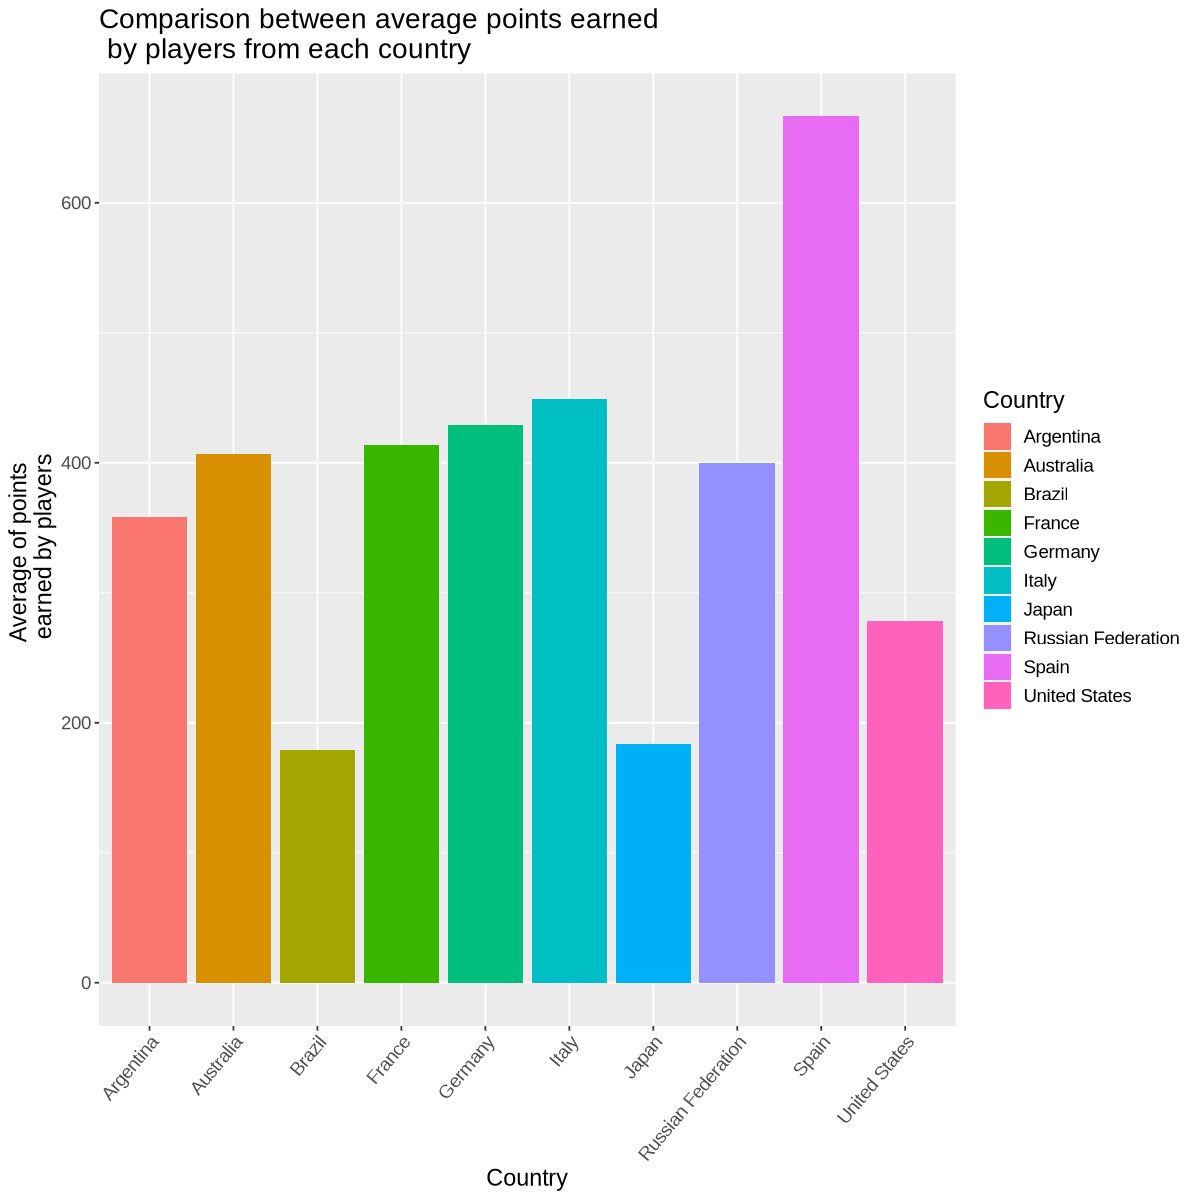

In [21]:
options(repr.plot.width = 10, repr.plot.height = 10)
avg_points_plot <- country_avg_points |>
                    ggplot(aes(x = Country, y = avg)) +
                    geom_bar(stat="identity", aes(fill=Country)) +
                    labs(x = "Country", y = "Average of points \n earned by players") +
                    ggtitle("Comparison between average points earned \n by players from each country") +
                    theme(text = element_text(size = 14)) +
                    theme(axis.text.x = element_text(angle = 50, hjust = 1))
avg_points_plot

With the plot above we can see the average contribution of points by players from each country.

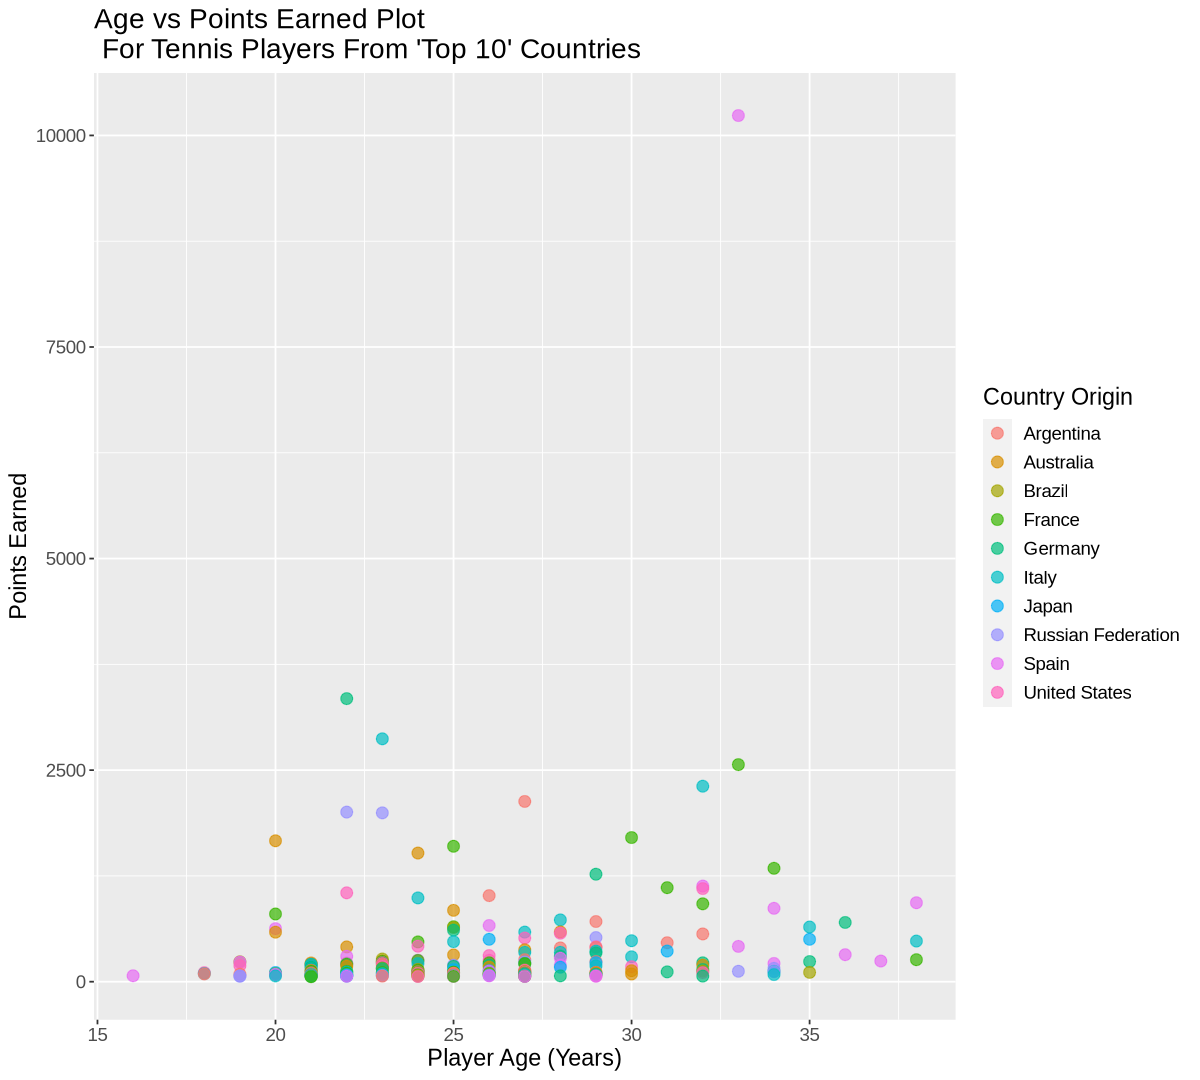

In [40]:
options(repr.plot.width = 10, repr.plot.height = 9)
age_points_plot <- tennis_train |>
    filter(Country %in% c("France",
                       "United States",
                       "Italy",
                       "Spain",
                       "Germany",
                       "Argentina",
                       "Australia",
                       "Russian Federation",
                       "Japan",
                       "Brazil")) |>
    ggplot(aes( x = Age, y = Current_Rank_Points, color = Country)) +
    geom_point(size = 3, alpha = 0.7) +
    labs(x = "Player Age (Years)", y = ("Points Earned"), color = "Country Origin") +
    ggtitle("Age vs Points Earned Plot \n For Tennis Players From 'Top 10' Countries") +
    theme(text = element_text(size = 14))
age_points_plot

In [ ]:
# Methods:
 
# We will conduct our data analysis by first separating our data specifically between the country, current 
# rank (points), name, and age. The main two columns that are going to help us understand what we’re looking
# for are the country and current rank (points). Once we get our tidy data and we’re able to make sense of 
# it, we’re then going to visualize our results using a bar graph to see which top 10 countries have 
# produced the most amount of talent. Using a bar graph makes the most sense in this case as it will let us
# both clearly and aesthetically visualize our data. We are defining “talent” as the current rank (points) 
# and determining the number of points that the players hailing from the countries they’re representing 
# have scored.  


In [ ]:
# Expected Outcomes and Significance:
 
# What do you expect to find?
# Just like in many things, in the realm of sports, there’s one country that consistently shows up – 
# The United States of America. We believe that we’ll see them having produced the most amount of talent 
# because their athletes have easier access to facilities geared towards making them the best. They also 
# have leagues for youth to be able to properly develop their skills. We have made note though that tennis 
# is an international sport and just like in the 100m race where we’ve seen Jamaicans consistently top, 
# there might be a country that only spends time developing tennis players. We found from looking at the 4 
# countries that make up the largest share of tennis players worldwide, are China, the U.S., India, and 
# Germany, so we feel pretty confident in our choice of the United States. 
# (https://www.statista.com/statistics/1110235/tennis-players-by-country/) 
 
# What impact could such findings have?
# The impacts of our findings could mean numerous things, but one thing we know for sure is that these 
# findings will be impactful. If the United States ends up being the country that has produced the most 
# amount of talent, then that’ll make sense. It’ll also mean that talent can be considered “country-born” 
# due to the development programs and wealth within the country that others couldn’t hope to compare with. 
# If the country is from the other top 2 though, such as China or India, we can determine the same thing 
# but also state that the amount number of youth that a country has also plays into the amount of talent 
# they’re able to create. If none of the 4 countries that we were able to find happen to make the graph, 
# then that means that it doesn’t matter if you have a large number of people or wealth, talent is inherent
# to individuals and geniuses who have not been developed still exist. It means that you don’t need to hail 
# from a “powerhouse” country to succeed in sports, especially when it comes to ones like tennis.
 
# What future questions could this lead to?
# Looking at the results we’ve found, certain players are just so dominant that single-handedly, they could 
# be considered country-level powerhouses. By concluding our question, we can open a world filled with even
# more questions. We can begin delving into unfair advantages in wealth and socioeconomic status between 
# countries, and what that means at the international level regarding “country pride” and the self-esteem 
# of youth living in those countries. Down the line, if we had more time, we would be interested in finding
# out from the players representing their countries in current rank (points), how many made their pro-debut
# before the age of 14. Did they happen to live in these countries and play tennis or have the countries 
# been actively involved in their development? Are they self-made, or quite literally, country-made?
 
# If we’re really stretching things, our findings could lead to further exciting discussions surrounding 
# ethics and what it really means to be great. We could say that this information about whether talent is 
# self-made or country-made can also help us manipulate things so we can see increases in “talent” in 
# certain areas. If we want to see more youth within science from a certain country, then does that mean
# that the governments of these countries actively need to be involved for their success?
